In [2]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv("../data/heart_disease.csv")

In [4]:
X = df.drop("num", axis=1)
y = df["num"]


In [5]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [6]:
importances = rf.feature_importances_
features = X.columns

feat_importances = pd.DataFrame({"Feature": features, "Importance": importances})
feat_importances = feat_importances.sort_values(by="Importance", ascending=False)


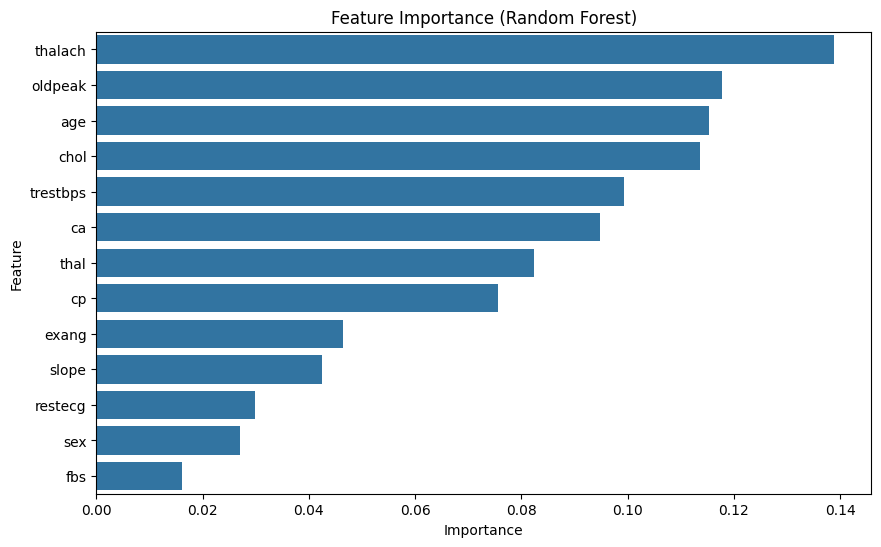

In [7]:
plt.figure(figsize=(10,6))
sns.barplot(x="Importance", y="Feature", data=feat_importances)
plt.title("Feature Importance (Random Forest)")
plt.show()

In [8]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=500)
rfe = RFE(model, n_features_to_select=6)  
rfe.fit(X, y)

selected_rfe = X.columns[rfe.support_]
print("✅ Selected Features by RFE:", list(selected_rfe))

C:\Users\Eman Hamdy\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 500 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=500).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Eman Hamdy\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 500 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=500).
You might also want to scale the data as shown in:
    htt

✅ Selected Features by RFE: ['sex', 'cp', 'fbs', 'exang', 'slope', 'ca']


In [9]:
from sklearn.feature_selection import SelectKBest, chi2
X_pos = X.copy()
X_pos[X_pos < 0] = 0  

chi2_selector = SelectKBest(chi2, k=6)  
X_kbest = chi2_selector.fit_transform(X_pos, y)

selected_chi2 = X.columns[chi2_selector.get_support()]
print("✅ Selected Features by Chi-Square:", list(selected_chi2))

✅ Selected Features by Chi-Square: ['chol', 'thalach', 'exang', 'oldpeak', 'ca', 'thal']


In [10]:
final_features = set(selected_rfe).union(set(selected_chi2))
df_reduced = df[list(final_features) + ["num"]]

In [11]:
df_reduced.to_csv("reduced_heart.csv", index=False)
print("✅ save reduced_heart.csv after Feature Selection")

✅ save reduced_heart.csv after Feature Selection
